<h1 align="center">AtliQo Bank Credit Card Launch: Phase 1</h1>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sqlalchemy import create_engine


<h2 align="center"> Import data from Input files <h2>

In [3]:
df_customer = pd.read_csv(r"D:\Ashish\Data Science\AtliQo-Bank-Credit-Card-Launch\Input\customers.csv")
df_customer.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [4]:
df_transaction = pd.read_csv(r"D:\Ashish\Data Science\AtliQo-Bank-Credit-Card-Launch\Input\transactions.csv")
df_transaction.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [5]:
df_credit_profile = pd.read_csv(r"D:\Ashish\Data Science\AtliQo-Bank-Credit-Card-Launch\Input\credit_profiles.csv")
df_credit_profile.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [6]:
print("Customer DF shape:", df_customer.shape)
print("Transaction DF shape:", df_transaction.shape)
print("Credit Profile DF shape:", df_credit_profile.shape)

Customer DF shape: (1000, 8)
Transaction DF shape: (500000, 7)
Credit Profile DF shape: (1004, 6)


<h2 align="Center"> Data Cleaning: Handle NULL values </h2>

In [7]:
df_customer.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


In [8]:
df_customer.loc[df_customer['annual_income'].isnull()].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,NaN,Married


In [9]:
mean_annual_income = df_customer['annual_income'].mean()
median_annual_income = df_customer['annual_income'].median()

print("Mean Annual Income:", mean_annual_income)
print("Median Annual Income:", median_annual_income)

Mean Annual Income: 139410.31473684212
Median Annual Income: 112218.5


<h3>We can replace the 0 values with the Mean or Median, but since there are different occupations, we need to calculate and apply the Mean/Median separately for each occupation.</h3>

In [10]:
occupation_wise_median = df_customer.groupby('occupation')['annual_income'].median()
occupation_wise_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

<h3>Use a Lambda Function with apply to Call get_median_value</h3>

In [11]:
df_customer['annual_income'] = df_customer.apply(lambda row: occupation_wise_median[row['occupation']] if pd.isnull(row['annual_income'])
                                                 else row['annual_income'], axis=1)

In [12]:
df_customer.loc[df_customer['annual_income'].isnull()].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [13]:
print("Annual income updated successfully.")
# print(df_customer.iloc[14]['annual_income'], df_customer.iloc[82]['annual_income'])
print(df_customer.iloc[[14, 82]]['annual_income'])

Annual income updated successfully.
14    45794.0
82    46759.0
Name: annual_income, dtype: float64


In [14]:
df_customer.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


<h3> Plot a Histogram of Annual Income </h3>

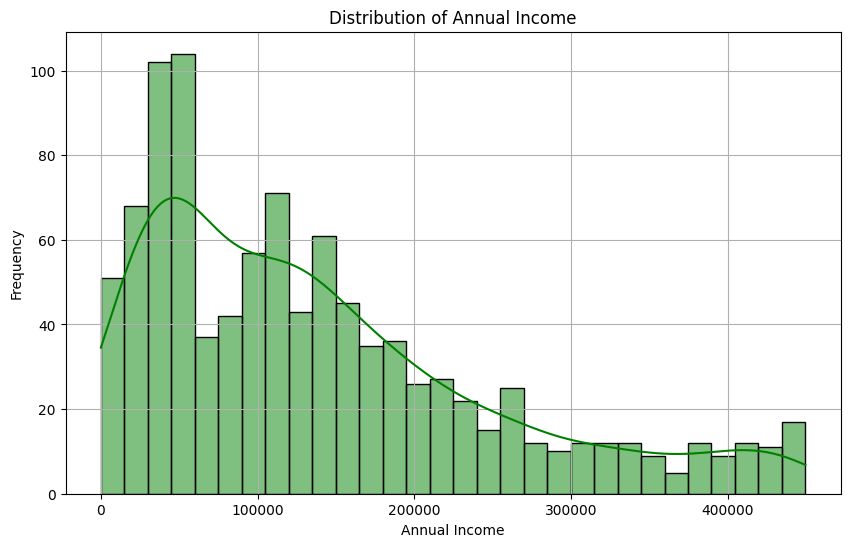

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_customer['annual_income'], bins=30, kde=True, color='green', label='Annual Income')

plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<h2 align="Center"> The annual income shows a right-skewed distribution. </h2>

<h2 align=Center> Exercise: Treat Outliers in Age Column </h2>

<h3> Age is valid only if it is between 15 and 85 years. </h3>

In [16]:
df_customer.loc[(df_customer['age'] < 15) | (df_customer['age'] > 85)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [17]:
occupation_wise_age = df_customer.groupby('occupation')['age'].median()
occupation_wise_age

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [18]:
df_customer['age'] = df_customer.apply(lambda row: occupation_wise_age[row['occupation']] 
                                       if (row['age'] < 15) | (row['age'] > 85) 
                                       else row['age'], axis=1)

In [19]:
df_customer.loc[(df_customer['age'] < 15) | (df_customer['age'] > 85)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [20]:
print(df_customer.iloc[[0, 41]][['occupation','age']])

        occupation   age
0   Business Owner  51.0
41          Artist  26.0


<h2 align=Center> Data Visualization: Age, Gender, Location </h2> 

<h3> Create Age group column [18-25, 26-48. 49-65] </h3>

In [21]:
bin_edge = [17, 25, 48, 65]

bin_labels = ['17-25', '26-48', '49-65']

df_customer['age_group'] = pd.cut(df_customer['age'], bins=bin_edge, labels=bin_labels)

In [22]:
df_customer.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,17-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,17-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


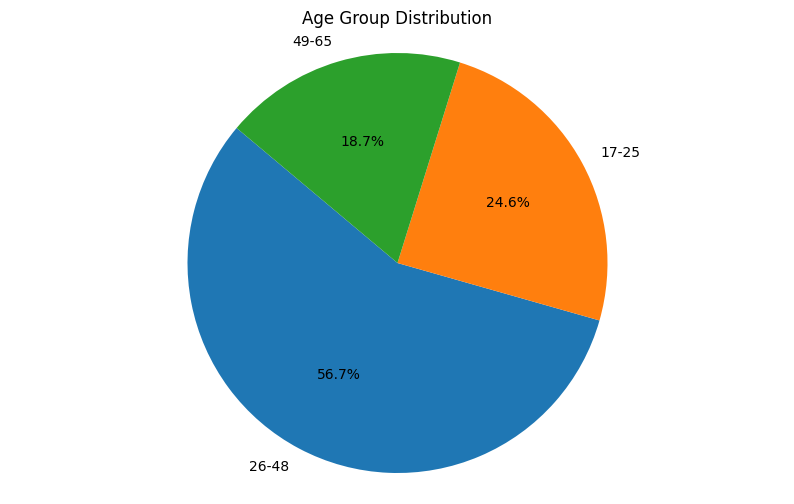

In [24]:
plt.figure(figsize=(10,6))

age_group_count = df_customer['age_group'].value_counts()

plt.pie(age_group_count, labels=age_group_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Age Group Distribution')
plt.axis('equal')
plt.show()

In [27]:
location_age_group = df_customer.groupby(['location', 'age_group']).size().unstack()
location_age_group

age_group,17-25,26-48,49-65
location,,,
City,172,392,119
Rural,26,46,13
Suburb,48,129,55


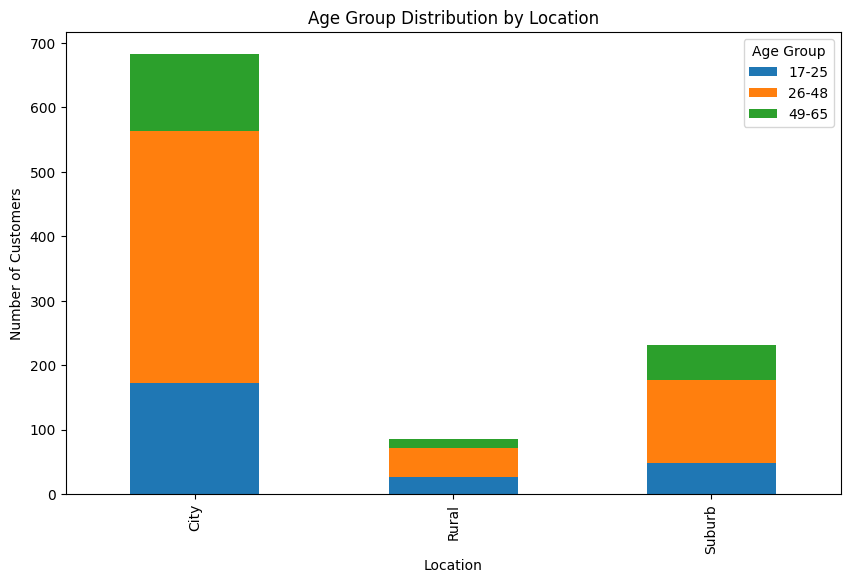

In [28]:
location_age_group.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Age Group Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.legend(title='Age Group')
plt.show()

In [29]:
location_gender_group = df_customer.groupby(['location', 'gender']).size().unstack()
location_gender_group


gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


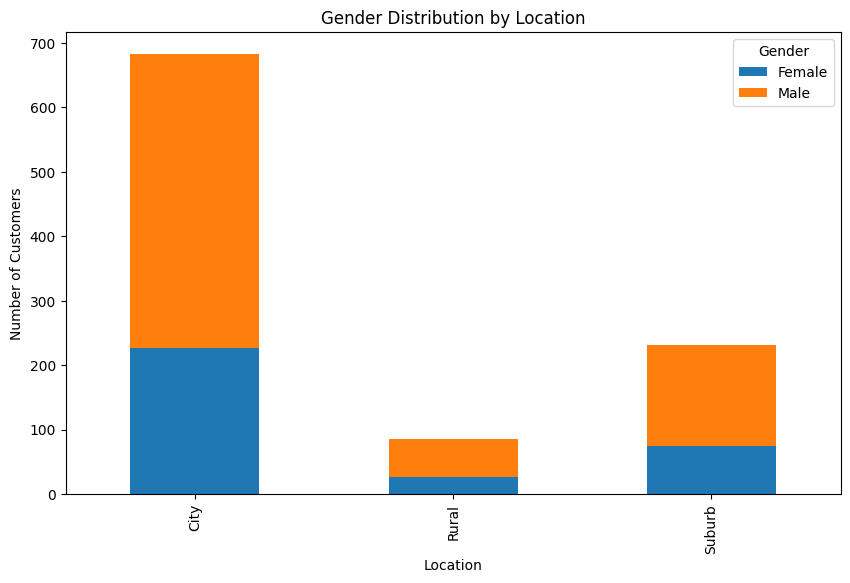

In [30]:
location_gender_group.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Gender Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.legend(title='Gender')
plt.show()

<h2 align=Center> Data Cleaning: Credit Score Table - Part 1 </h2>

In [31]:
df_credit_profile.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [32]:
df_credit_profile.shape

(1004, 6)

In [34]:
df_customer.shape

(1000, 9)

<h3>Our input contains 1000 customers, but the credit profiles dataset has 1004 records.</h3>
<h3>This indicates the presence of duplicate records.</h3>

In [35]:
df_credit_profile[df_credit_profile['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [36]:
df_credit_profile = df_credit_profile.drop_duplicates(subset=['cust_id'], keep='last')
df_credit_profile.shape

(1000, 6)

<h2 align=Center> Handel NULL values from Credit profiles Dataset </h2>

In [37]:
df_credit_profile.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [38]:
df_credit_profile[df_credit_profile['credit_limit'].isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [39]:
df_credit_profile['credit_limit'].value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

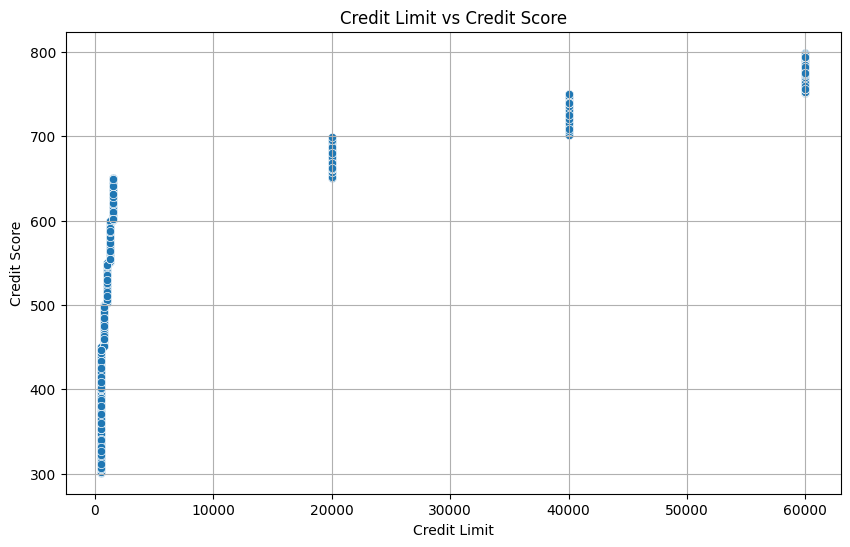

In [41]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_credit_profile, x='credit_limit', y='credit_score')
plt.title('Credit Limit vs Credit Score')
plt.xlabel('Credit Limit')
plt.ylabel('Credit Score')
plt.grid(True)
plt.show()

<h3> We observed a range of credit scores, so we are adding a new column to the DataFrame to represent credit score ranges. </h3>

In [43]:
bin_range = [300, 450, 500, 550, 600, 650, 700, 750, 800]

bin_labels = [f'{start}-{end-1}' for start, end in zip(bin_range, bin_range[1:])]

df_credit_profile['credit_score_range'] = pd.cut(df_credit_profile['credit_score'], 
                                                 bins=bin_range, labels=bin_labels, right=False, include_lowest=True)

df_credit_profile.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


<h3> We derived the credit_score_range column and used mode() in groupby to capture the most frequently occurring credit score within each group. </h3>

In [46]:
group_credit_limit_range = df_credit_profile.groupby('credit_score_range')['credit_limit'].agg(lambda x: x.mode().iloc[0])
group_credit_limit_range

credit_score_range
300-449      500.0
450-499      750.0
500-549     1000.0
550-599     1250.0
600-649     1500.0
650-699    20000.0
700-749    40000.0
750-799    60000.0
Name: credit_limit, dtype: float64

<h3>Replace NULL values in credit_limit with the corresponding group value from credit_score_range</h3>

In [47]:
df_credit_profile['credit_limit'] = df_credit_profile.apply(lambda row: group_credit_limit_range[row['credit_score_range']] 
                                                            if pd.isnull(row['credit_limit']) else row['credit_limit'], axis=1)

In [48]:
df_credit_profile.isnull().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
dtype: int64

In [49]:
df_credit_profile[df_credit_profile['credit_limit'].isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
